# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=41e70f5c693d3d10917e45395afb7610"
    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-"*30)

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url.format(city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-"*30)
print("Data Retrieval Complete      ")
print("-"*30)

Beginning Data Retrieval     
------------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | minas de marcona
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | gangneung
Processing Record 8 of Set 1 | sao jose da coroa grande
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | ancud
Processing Record 13 of Set 1 | saint-joseph
Processing Record 14 of Set 1 | uyuni
Processing Record 15 of Set 1 | san sebastian de la gomera
Processing Record 16 of Set 1 | tahoua
Processing Record 17 of Set 1 | le morne-rouge
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | al bardi

Processing Record 47 of Set 4 | olinda
Processing Record 48 of Set 4 | labytnangi
Processing Record 49 of Set 4 | lubuklinggau
Processing Record 0 of Set 5 | emerald
Processing Record 1 of Set 5 | souillac
Processing Record 2 of Set 5 | mabaruma
Processing Record 3 of Set 5 | gobabis
Processing Record 4 of Set 5 | narvik
Processing Record 5 of Set 5 | egilsstadir
Processing Record 6 of Set 5 | lebu
Processing Record 7 of Set 5 | toga village
Processing Record 8 of Set 5 | baykal'sk
Processing Record 9 of Set 5 | petropavlovsk-kamchatsky
Processing Record 10 of Set 5 | middelburg
Processing Record 11 of Set 5 | viedma
Processing Record 12 of Set 5 | keflavik
Processing Record 13 of Set 5 | salinopolis
Processing Record 14 of Set 5 | kristiansund
Processing Record 15 of Set 5 | daru
Processing Record 16 of Set 5 | palikir - national government center
Processing Record 17 of Set 5 | arraial do cabo
Processing Record 18 of Set 5 | anar darah
Processing Record 19 of Set 5 | jamestown
Proces

Processing Record 45 of Set 8 | baiti
Processing Record 46 of Set 8 | roccella ionica
Processing Record 47 of Set 8 | piney green
Processing Record 48 of Set 8 | fale old settlement
Processing Record 49 of Set 8 | alesund
Processing Record 0 of Set 9 | pathein
Processing Record 1 of Set 9 | usinsk
Processing Record 2 of Set 9 | belyy yar
Processing Record 3 of Set 9 | tres coroas
Processing Record 4 of Set 9 | tachilek
Processing Record 5 of Set 9 | meadow lakes
Processing Record 6 of Set 9 | feijo
Processing Record 7 of Set 9 | kalmunai
Processing Record 8 of Set 9 | port saint john's
Processing Record 9 of Set 9 | bayevo
Processing Record 10 of Set 9 | ust-tsilma
Processing Record 11 of Set 9 | ambon
Processing Record 12 of Set 9 | sinan
Processing Record 13 of Set 9 | kolonia town
Processing Record 14 of Set 9 | mhamid
Processing Record 15 of Set 9 | christchurch
Processing Record 16 of Set 9 | auki
Processing Record 17 of Set 9 | manicore
Processing Record 18 of Set 9 | manikpur
Pr

Processing Record 40 of Set 12 | paita
Processing Record 41 of Set 12 | novyy urgal
Processing Record 42 of Set 12 | devils lake
Processing Record 43 of Set 12 | cargados carajos
Processing Record 44 of Set 12 | o barco de valdeorras
Processing Record 45 of Set 12 | fuvahmulah
Processing Record 46 of Set 12 | kulhudhuffushi
Processing Record 47 of Set 12 | saryozek
Processing Record 48 of Set 12 | sturlic
Processing Record 49 of Set 12 | binkolo
Processing Record 0 of Set 13 | ampara
Processing Record 1 of Set 13 | vila do maio
Processing Record 2 of Set 13 | podilsk
Processing Record 3 of Set 13 | preobrazheniye
------------------------------
Data Retrieval Complete      
------------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,51.5085,-0.1257,285.37,75,75,5.14,GB,1686012001
1,bethel,51.5085,-0.1257,285.37,75,75,5.14,GB,1686012001
2,longyearbyen,51.5085,-0.1257,285.37,75,75,5.14,GB,1686012001
3,grytviken,51.5085,-0.1257,285.37,75,75,5.14,GB,1686012001
4,minas de marcona,51.5085,-0.1257,285.37,75,75,5.14,GB,1686012001


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data\cities.csv")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="Unnamed: 0")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,51.5085,-0.1257,285.37,75,75,5.14,GB,1686012001
1,bethel,51.5085,-0.1257,285.37,75,75,5.14,GB,1686012001
2,longyearbyen,51.5085,-0.1257,285.37,75,75,5.14,GB,1686012001
3,grytviken,51.5085,-0.1257,285.37,75,75,5.14,GB,1686012001
4,minas de marcona,51.5085,-0.1257,285.37,75,75,5.14,GB,1686012001


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

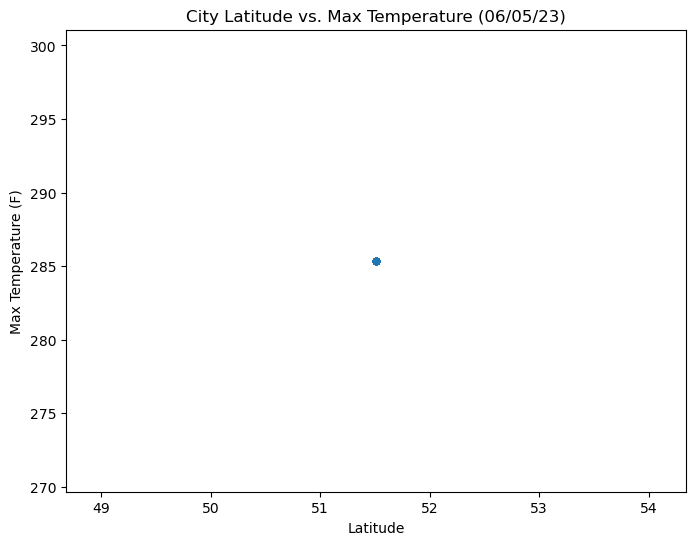

In [9]:
# Create a scatter plot of Latitude vs. Temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", figsize=(8,6))

# Set the title and labels
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

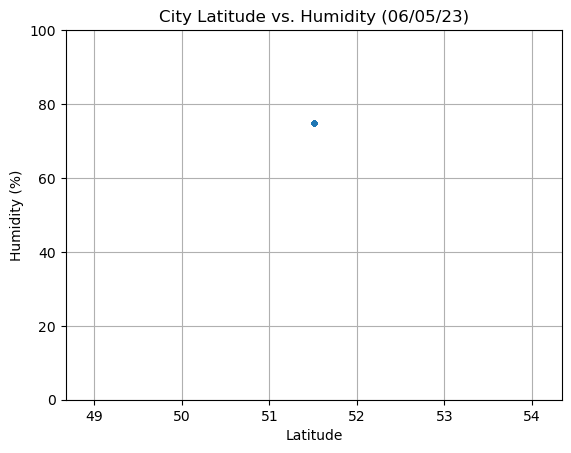

In [10]:
# Create a scatter plot of Latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", s=10)

# Set the chart title and labels
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set the y-axis limit
plt.ylim(0, 100)

# Set the grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

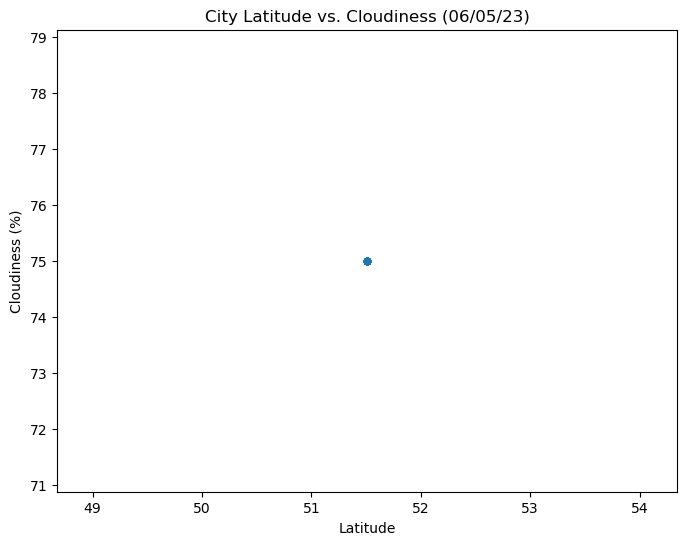

In [11]:
# Create a scatter plot of Latitude vs. Cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", figsize=(8,6))

# Set the title and labels
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

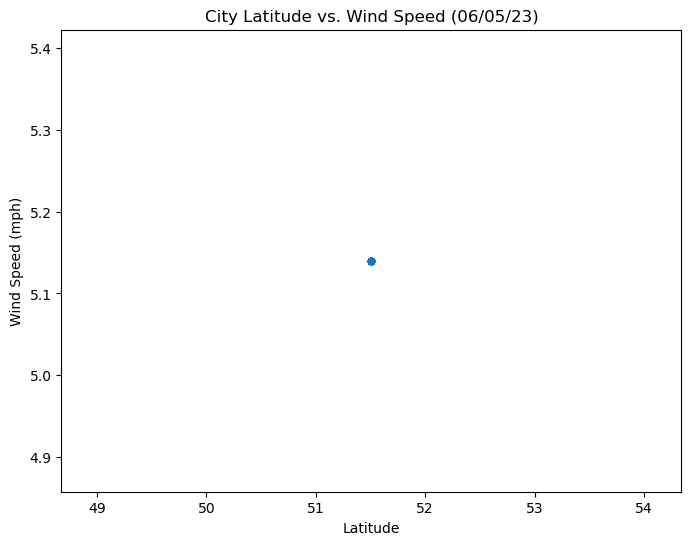

In [12]:
# Create a scatter plot of Latitude vs. Wind Speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", figsize=(8,6))

# Set the title and labels
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,51.5085,-0.1257,285.37,75,75,5.14,GB,1686012001
1,bethel,51.5085,-0.1257,285.37,75,75,5.14,GB,1686012001
2,longyearbyen,51.5085,-0.1257,285.37,75,75,5.14,GB,1686012001
3,grytviken,51.5085,-0.1257,285.37,75,75,5.14,GB,1686012001
4,minas de marcona,51.5085,-0.1257,285.37,75,75,5.14,GB,1686012001


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


###  Temperature vs. Latitude Linear Regression Plot

ValueError: Cannot calculate a linear regression if all x values are identical

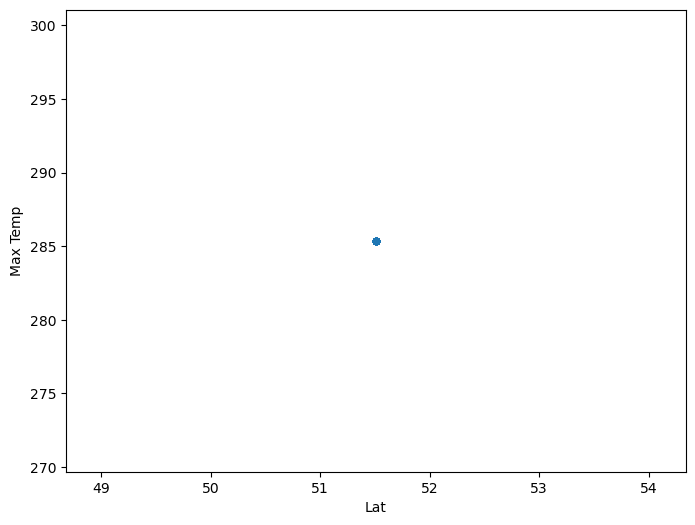

In [16]:
# Linear regression on Northern Hemisphere
# Create scatter plot of Latitude vs. Max Temperature for northern hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp", figsize=(8,6))

# Define parameters for linear regression function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature (F)"
title = "Northern Hemisphere - City Latitude vs. Max Temperature (%s)" % time.strftime("%x")
text_coordinates = (0, -30)

# Call linear regression function
plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

# Display plot
plt.show()

ValueError: Inputs must not be empty.

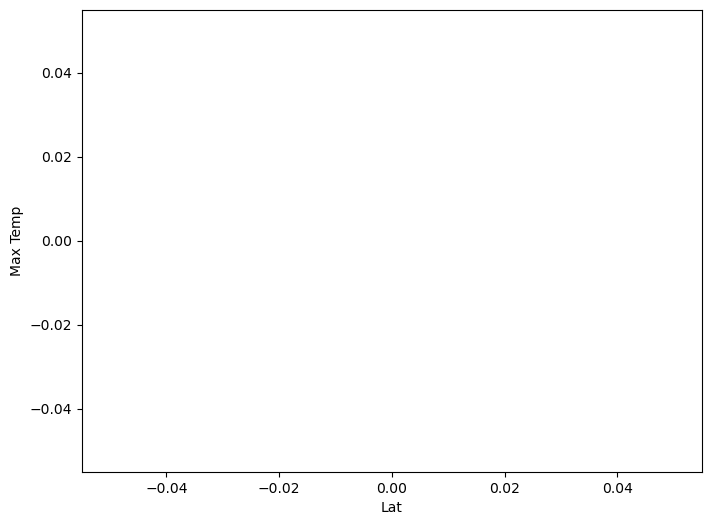

In [17]:
# Linear regression on Southern Hemisphere
# Create scatter plot of Latitude vs. Max Temperature for southern hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp", figsize=(8,6))

# Define parameters for linear regression function
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature (F)"
title = "Southern Hemisphere - City Latitude vs. Max Temperature (%s)" % time.strftime("%x")
text_coordinates = (-55, 90)

# Call linear regression function
plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

# Display plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

ValueError: Cannot calculate a linear regression if all x values are identical

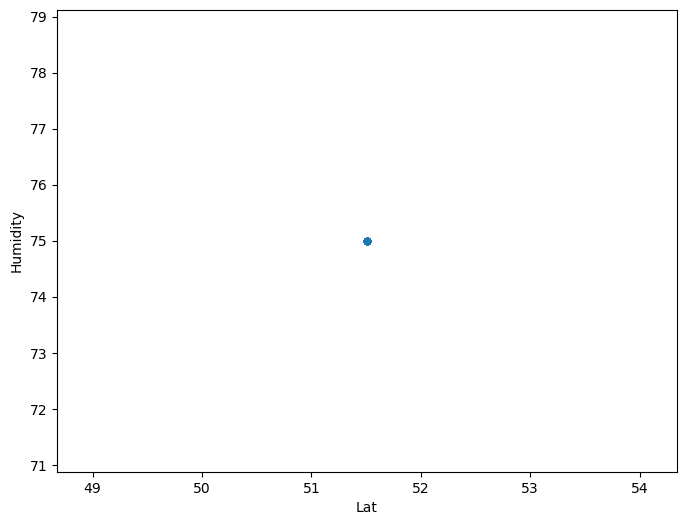

In [18]:
# Northern Hemisphere
# Create scatter plot of Latitude vs. Humidity for northern hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Humidity", figsize=(8,6))

# Define parameters for linear regression function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity (%)"
title = "Northern Hemisphere - City Latitude vs. Humidity (%s)" % time.strftime("%x")
text_coordinates = (45, 10)

# Call linear regression function
plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

# Display plot
plt.show()

ValueError: Inputs must not be empty.

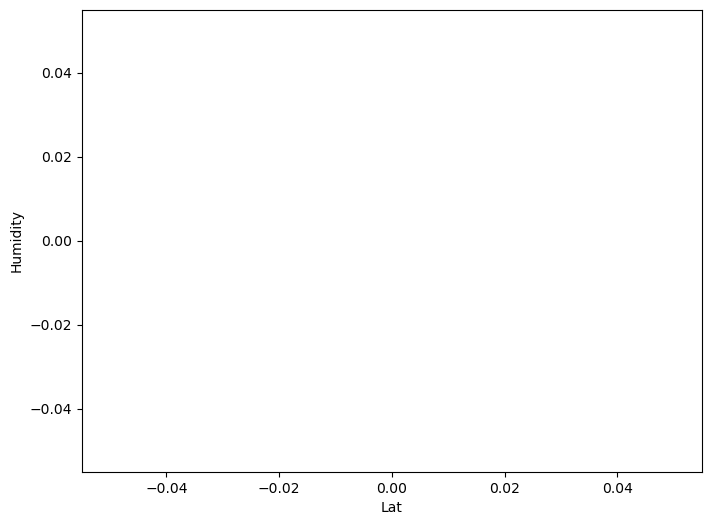

In [19]:
# Southern Hemisphere
# Create scatter plot of Latitude vs. Humidity for southern hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Humidity", figsize=(8,6))

# Define parameters for linear regression function
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity (%)"
title = "Southern Hemisphere - City Latitude vs. Humidity (%s)" % time.strftime("%x")
text_coordinates = (-55, 20)

# Call linear regression function
plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

# Display plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

ValueError: Cannot calculate a linear regression if all x values are identical

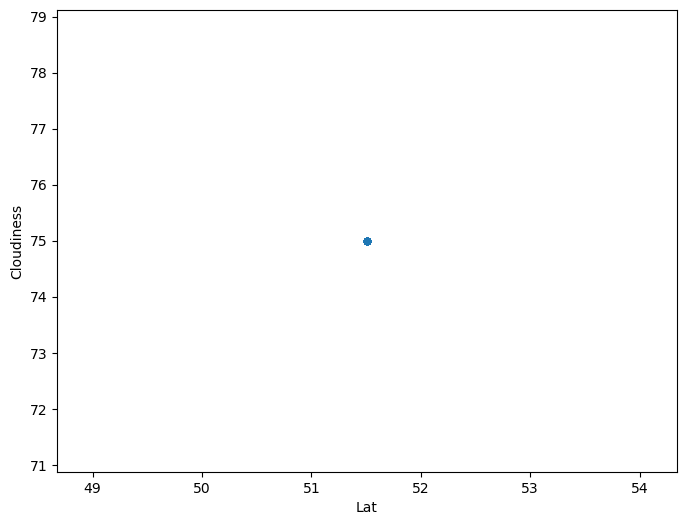

In [20]:
# Northern Hemisphere
# Create scatter plot of Latitude vs. Cloudiness for northern hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Cloudiness", figsize=(8,6))

# Define parameters for linear regression function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness (%)"
title = "Northern Hemisphere - City Latitude vs. Cloudiness (%s)" % time.strftime("%x")
text_coordinates = (45, 10)

# Call linear regression function
plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

# Display plot
plt.show()

In [21]:
# Southern Hemisphere
# Create scatter plot of Latitude vs. Cloudiness for southern hemisphere
southern_hemisphere_df.plot(kind="scatter", x="Lat", y="Cloudiness", figsize=(8,6))

# Define parameters for linear regression function
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness (%)"
title = "Southern Hemisphere - City Latitude vs. Cloudiness (%s)" % time.strftime("%x")
text_coordinates = (-55, 60)

# Call linear regression function
plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

# Display plot
plt.show()

NameError: name 'southern_hemisphere_df' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

ValueError: Cannot calculate a linear regression if all x values are identical

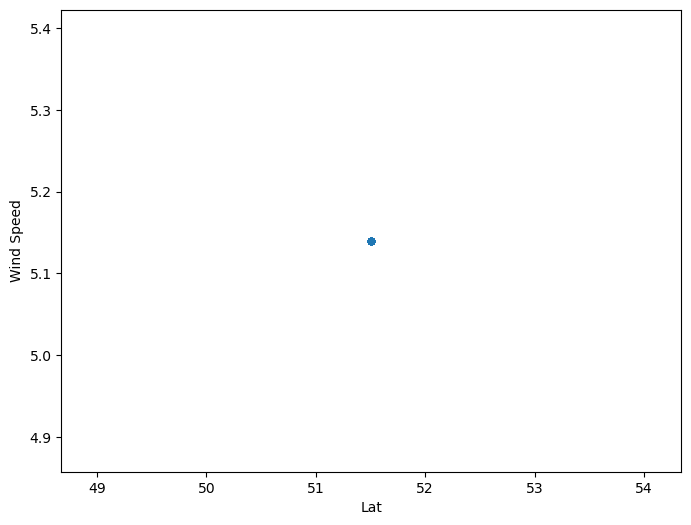

In [22]:
# Northern Hemisphere
# Create scatter plot of Latitude vs. Wind Speed for northern hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed", figsize=(8,6))

# Define parameters for linear regression function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed (mph)"
title = "Northern Hemisphere - City Latitude vs. Wind Speed (%s)" % time.strftime("%x")
text_coordinates = (10, 25)

# Call linear regression function
plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

# Display plot
plt.show()

In [23]:
# Southern Hemisphere
# Create scatter plot of Latitude vs. Wind Speed for southern hemisphere
southern_hemisphere_df.plot(kind="scatter", x="Lat", y="Wind Speed", figsize=(8,6))

# Define parameters for linear regression function
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed (mph)"
title = "Southern Hemisphere - City Latitude vs. Wind Speed (%s)" % time.strftime("%x")
text_coordinates = (-55, 25)

# Call linear regression function
plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

# Display plot
plt.show()

NameError: name 'southern_hemisphere_df' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE